In [1]:
path = "C:/Users/Zeta/Downloads/"
import os
os.path.isfile(path+"sim_improved-learning2.csv")

True

In [2]:
import pandas as pd
df = pd.read_csv(path+"sim_improved-learning2.csv")
df.head()

,light,oncoming,left,waypoint,None,forward,right,left.1
0,green,None,right,left,-2.9210,1.5555,0.1170,0.0000
1,red,None,left,right,0.0000,0.0000,1.9403,-8.2500
2,green,None,right,right,-2.8753,0.0000,2.4743,0.0000
3,green,left,right,forward,0.0000,1.3505,0.0000,0.0000
4,red,left,right,forward,0.0000,-19.5539,0.5275,-5.2522


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df.columns = ['light', 'oncoming','t-left', 'waypoint', 'None', 'forward', 'right', 'left']

In [19]:
df['state'] = df[['light', 'oncoming']].apply(lambda x: [item[0] for item in x])

In [20]:
df.head()

,light,oncoming,t-left,waypoint,None,forward,right,left,state
0,green,None,right,left,-2.9210,1.5555,0.1170,0.0000,g
1,red,None,left,right,0.0000,0.0000,1.9403,-8.2500,r
2,green,None,right,right,-2.8753,0.0000,2.4743,0.0000,g
3,green,left,right,forward,0.0000,1.3505,0.0000,0.0000,g
4,red,left,right,forward,0.0000,-19.5539,0.5275,-5.2522,r


In [13]:
sel = df[(df.light=='green') & (df.waypoint=='forward')]\
[['None', 'forward', 'right', 'left']].transpose()

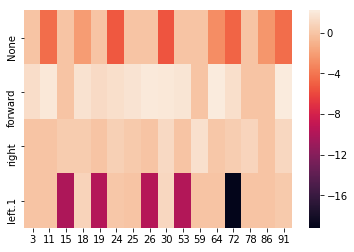

In [14]:
sns.heatmap(sel)

In [32]:
states = df[['oncoming', 't-left', 'waypoint']].as_matrix()
df['state'] = pd.Series([",".join([v[0] for v in state]).upper() for state in states])


In [33]:
df.head()

,light,oncoming,t-left,waypoint,None,forward,right,left,state
0,green,None,right,left,-2.9210,1.5555,0.1170,0.0000,"N,R,L"
1,red,None,left,right,0.0000,0.0000,1.9403,-8.2500,"N,L,R"
2,green,None,right,right,-2.8753,0.0000,2.4743,0.0000,"N,R,R"
3,green,left,right,forward,0.0000,1.3505,0.0000,0.0000,"L,R,F"
4,red,left,right,forward,0.0000,-19.5539,0.5275,-5.2522,"L,R,F"


In [50]:
def qm_groups(df, signal='green', marker='6'):
    sg = 'red' if signal=='red' else 'green'
    QM = df[df.light==sg][['None', 'forward', 'left', 'right']].as_matrix()
    states = df[df.light==sg]['state'] # match signal and marker
    
    threes = [(state, QM[i]) for i, state in enumerate(states) if QM[i].max() > QM[i].min() ] # include if visited > 0
    threes.sort()
    return zip(*threes) # sorted indices of states matching signal and marker


In [69]:
def show_qmatrix(states, QM, fignum):
    ylabels=['None', 'Forward', 'Left', 'Right']
    
    xlreds = [x.replace(",", '\n') for x in states]
    xlreds[0] = '\n'.join([": ".join(x) for x in zip(["Oncoming","Left", "Direction"],xlreds[0].split('\n'))])

    f2 = plt.figure(figsize=(20,5)) 
    sp1 = f2.add_subplot(1, 1, 1)
    annotsize = {'size':14.0}
    
    sns.heatmap(QM.transpose(), linewidth=.1, yticklabels = ylabels, \
                xticklabels= xlreds, vmin=-2.0, vmax=2.0, annot=True, annot_kws=annotsize, fmt='.1f', cmap='RdYlGn')
    
    #plt.text(size=12.0)
    plt.yticks(rotation=0, size=14, ha='right');
    plt.xticks(rotation=0., size=14, ha='right');
    


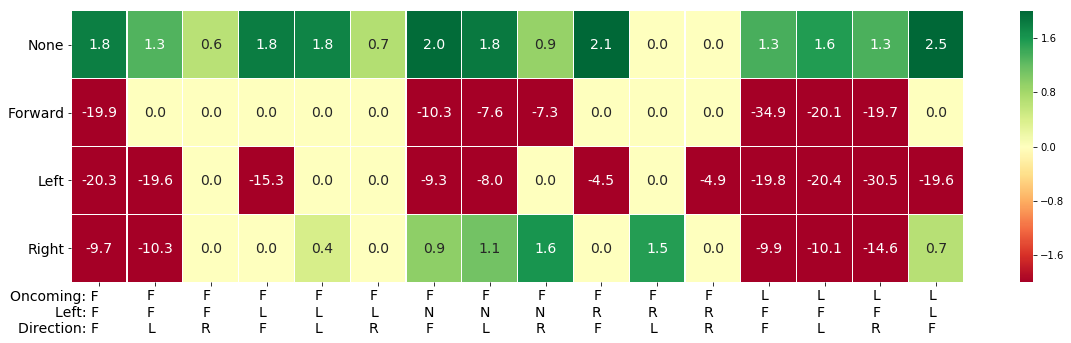

In [71]:
#threes = qm_groups('green',fg)
states, qred = qm_groups(df, 'red')

#show_qmatrix(states, qred, 6)
#import numpy as np
#np.array(qred)
show_qmatrix(states[:16], np.array(qred[:16]), 6)

In [76]:
A = np.array([56, 0, 4.4, 68, 1.2, 104.0, 52, 8, 1.8, 135, 99, 0.9]).reshape(3, 4)
A

array([[ 56. ,   0. ,   4.4,  68. ],
       [  1.2, 104. ,  52. ,   8. ],
       [  1.8, 135. ,  99. ,   0.9]])

In [77]:
100 * A / A.sum(axis=0)

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])